In [1]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from keras.layers import Dense
from sklearn.metrics import classification_report
from keras.models import Sequential
import numpy as np

In [2]:
#dataset
data=pd.read_csv("train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567730 entries, 0 to 567729
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  567730 non-null  object 
 1   ProductName                                        567730 non-null  object 
 2   EngineVersion                                      567730 non-null  object 
 3   AppVersion                                         567730 non-null  object 
 4   AvSigVersion                                       567730 non-null  object 
 5   IsBeta                                             567730 non-null  int64  
 6   RtpStateBitfield                                   565568 non-null  float64
 7   IsSxsPassiveMode                                   567730 non-null  int64  
 8   DefaultBrowsersIdentifier                          29267 non-null   float6

In [ ]:
# Drop columns which have large number of null values and are unnecessary as well

In [3]:
df = data.drop(columns=[
                        "DefaultBrowsersIdentifier",
                        "OrganizationIdentifier",
                        "PuaMode",
                        "SmartScreen",
                        "Census_ProcessorClass",
                        "Census_InternalBatteryType",
                        "Census_IsFlightingInternal",
                        "Census_ThresholdOptIn",
                        "Census_IsWIMBootEnabled",
                        "Unnamed: 83"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567730 entries, 0 to 567729
Data columns (total 74 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  567730 non-null  object 
 1   ProductName                                        567730 non-null  object 
 2   EngineVersion                                      567730 non-null  object 
 3   AppVersion                                         567730 non-null  object 
 4   AvSigVersion                                       567730 non-null  object 
 5   IsBeta                                             567730 non-null  int64  
 6   RtpStateBitfield                                   565568 non-null  float64
 7   IsSxsPassiveMode                                   567730 non-null  int64  
 8   AVProductStatesIdentifier                          565004 non-null  float6

In [ ]:
# Select Malware and Non-Malware Classes

In [4]:
df=df[(df["HasDetections"]==0)|(df["HasDetections"]==1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567698 entries, 0 to 567729
Data columns (total 74 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  567698 non-null  object 
 1   ProductName                                        567698 non-null  object 
 2   EngineVersion                                      567698 non-null  object 
 3   AppVersion                                         567698 non-null  object 
 4   AvSigVersion                                       567698 non-null  object 
 5   IsBeta                                             567698 non-null  int64  
 6   RtpStateBitfield                                   565536 non-null  float64
 7   IsSxsPassiveMode                                   567698 non-null  int64  
 8   AVProductStatesIdentifier                          564972 non-null  float6

In [ ]:
# Drop Null Values

In [5]:
df = df.dropna()

In [ ]:
# Label Encoding on Object Type Columns

In [6]:
object=df.select_dtypes(include=['object'])
le=LabelEncoder()
for feature in object:
    
    df[feature]=le.fit_transform(df[feature].astype(str))

In [ ]:
# Statistics

In [7]:
df.describe()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,452486.000000,452486.000000,452486.000000,452486.000000,452486.00000,452486.0,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.00000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.0,452486.000000,452486.000000,452486.000000,4.524860e+05,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,4.524860e+05,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000,452486.000000
mean,226242.500000,0.999178,38.992309,42.038560,3078.08141,0.0,6.810010,0.022014,46761.578325,1.385572,1.022224,0.998276,108.11262,81287.935269,169.889382,121.602894,0.026275,1.100750,0.148354,15909.529205,582.979999,3.445550,200.093888,4.673256,0.949064,0.0,0.000743,123.109486,0.979164,2.909567e+01,5.306056,0.000002,1085.443737,238691.514272,3.916822,4.525935,2352.971665,5.042377e+05,0.432522,83410.225797,0.076555,5912.178326,15.850384,84.574296,1544.150453,895.968326,2.824364,1365.173835,194.953309,0.201553,4.109667,13.427976,1002.423695,6.564656,5.205284,5.386069,56.636767,60.398147,1.993335,0.000407,0.930469,1.211390,0.000015,2.970079,406.362756,32985.775938,0.501527,0.004358,0.141520,0.043078,0.068842,0.278970,7.933437,0.153578
std,130621.601289,0.028661,2.446010,12.297993,442.07008,0.0,1.124136,0.146729,15115.761378,0.552502,0.171216,0.041483,63.09354,48884.525287,89.112471,68.795944,0.225988,0.301277,1.265202,1915.143969,245.963851,1.220474,45.599652,1.009539,0.219868,0.0,0.027240,31.930542,0.142835,1.336498e+04,2.507624,0.001487,689.821577,71767.338169,1.973377,1.294299,844.312026,3.524394e+05,0.696461,49045.577978,0.265884,4607.232786,5.238372,69.221448,364.258211,216.146650,1.312015,1818.428178,56.293959,0.601996,3.072910,6.549634,2976.554403,4.898199,4.418650,2.082998,24.286063,44.909286,1.294506,0.020161,0.310294,1.02180

In [ ]:
# Drop columns which have low variance

In [8]:
df=df.drop(columns=["ProductName",
                        "EngineVersion",
                        "IsBeta",
                        "RtpStateBitfield",
                        "IsSxsPassiveMode",
                        "AVProductsInstalled",
                        "AVProductsEnabled",
                        "HasTpm",
                        "Platform",
                        "Processor",
                        "OsVer",
                        "OsPlatformSubRelease",
                        "SkuEdition",
                        "IsProtected",
                        "AutoSampleOptIn",
                        "SMode",
                        "Firewall",
                        "UacLuaenable",
                        "Census_DeviceFamily",
                        "Census_ProcessorCoreCount",
                        "Census_ProcessorManufacturerIdentifier",
                        "Census_PrimaryDiskTypeName",
                        "Census_HasOpticalDiskDrive",
                        "Census_OSArchitecture",
                        "Census_IsPortableOperatingSystem",
                        "Census_GenuineStateName",
                        "Census_IsFlightsDisabled",
                        "Census_FlightRing",
                        "Census_IsSecureBootEnabled",
                        "Census_IsTouchEnabled",
                        "Census_IsPenCapable",
                        "Census_IsAlwaysOnAlwaysConnectedCapable",
                        "Wdft_IsGamer"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452486 entries, 0 to 567729
Data columns (total 41 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  452486 non-null  int32  
 1   AppVersion                                         452486 non-null  int32  
 2   AvSigVersion                                       452486 non-null  int32  
 3   AVProductStatesIdentifier                          452486 non-null  float64
 4   CountryIdentifier                                  452486 non-null  int64  
 5   CityIdentifier                                     452486 non-null  float64
 6   GeoNameIdentifier                                  452486 non-null  float64
 7   LocaleEnglishNameIdentifier                        452486 non-null  int64  
 8   OsBuild                                            452486 non-null  int64 

In [ ]:
# Select Features and Target Column

In [9]:
X = df[df.columns.drop("HasDetections")]
y = df[["HasDetections"]]

In [10]:
# building the model and fitting the data
log_reg = sm.Logit(y, X).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.248620
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          HasDetections   No. Observations:               452486
Model:                          Logit   Df Residuals:                   452446
Method:                           MLE   Df Model:                           39
Date:                Wed, 18 May 2022   Pseudo R-squ.:                  0.4203
Time:                        12:35:51   Log-Likelihood:            -1.1250e+05
converged:                       True   LL-Null:                   -1.9406e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
MachineIdentifier                                  2.099e-05   8.32e-08    252.160      0.000    2.08e-05    2.12e-05
AppVersion                                            0.0002      0.001      0.353      0.724      -0.001       0.001
AvSigVersion                                          0.0001   1.35e-05      8.079      0.000    8.23e-05       0.000
AVProductStatesIdentifier                          1.805e-05   4.12e-07     43.810      0.000    1.72e-05    1.89e-05
CountryIdentifier                                  7.554e-05      0.000      0.690      0.490      -0.000       0.000
CityIdentifier                                    -4.061e-07   1.09e-07     -3.729      0.000   -6.19e-07   -1.93e-07
GeoNameIdentifier                                    -0.0002   8.06e-05     -2.222      0.026      -0.000   -2.11e-05
LocaleEnglishNameIdentifier                           0.0009   8.23e-05     11.312      0.000       0.001       0.001
OsBuild                                              -0.0005   7.01e-06    -68.884      0.000      -0.000      -0.000
OsSuite                                              -0.0010    7.5e-05    -13.649      0.000      -0.001      -0.001
OsBuildLab                                            0.0039      0.001      6.792      0.000       0.003       0.005
IeVerIdentifier                                      -0.0125      0.001    -23.139      0.000      -0.014      -0.011
Census_MDC2FormFactor                                 0.0060      0.003      1.805      0.071      -0.001       0.013
Census_OEMNameIdentifier                          -2.659e-05   9.07e-06     -2.933      0.003   -4.44e-05   -8.82e-06
Census_OEMModelIdentifier                         -5.789e-07   8.06e-08     -7.183      0.000   -7.37e-07   -4.21e-07
Census_ProcessorModelIdentifier                     1.61e-05   6.52e-06      2.470      0.014    3.33e-06    2.89e-05
Census_PrimaryDiskTotalCapacity                    2.616e-07   1.72e-08     15.233      0.000    2.28e-07    2.95e-07
Census_SystemVolumeTotalCapacity                  -1.639e-06   1.21e-07    -13.561      0.000   -1.88e-06    -1.4e-06
Census_TotalPhysicalRAM                            1.828e-05    1.3e-06     14.112      0.000    1.57e-05    2.08e-05
Census_ChassisTypeName                               -0.0032      0.002     -1.952      0.051      -0.006    1.31e-05
Census_InternalPrimaryDiagonalDisplaySizeInInches    -0.0010   9.79e-05     -9.746      0.000      -0.001      -0.001
Census_InternalPrimaryDisplayResolutionHorizontal     0.0004   3.87e-05     11.463      0.000       0.000       0.001
Census_InternalPrimaryDisplayResolutionVertical      -0.0009   6.85e-05    -12.865      0.000      -0.001      -0.001
Census_PowerPlatformRoleName                         -0.0690      0.005    -13.250      0.000      -0.079      -0.059
Census_InternalBatteryNumberOfCharges             -1.07

In [ ]:
# Drop featutes whicjh have p > |z| greater than 0.05

In [11]:
X=X.drop(columns=["AppVersion",
                      "CountryIdentifier",
                      "Census_MDC2FormFactor",
                      "Census_ChassisTypeName",
                      "Census_FirmwareVersionIdentifier"])

In [ ]:
# Features Importance

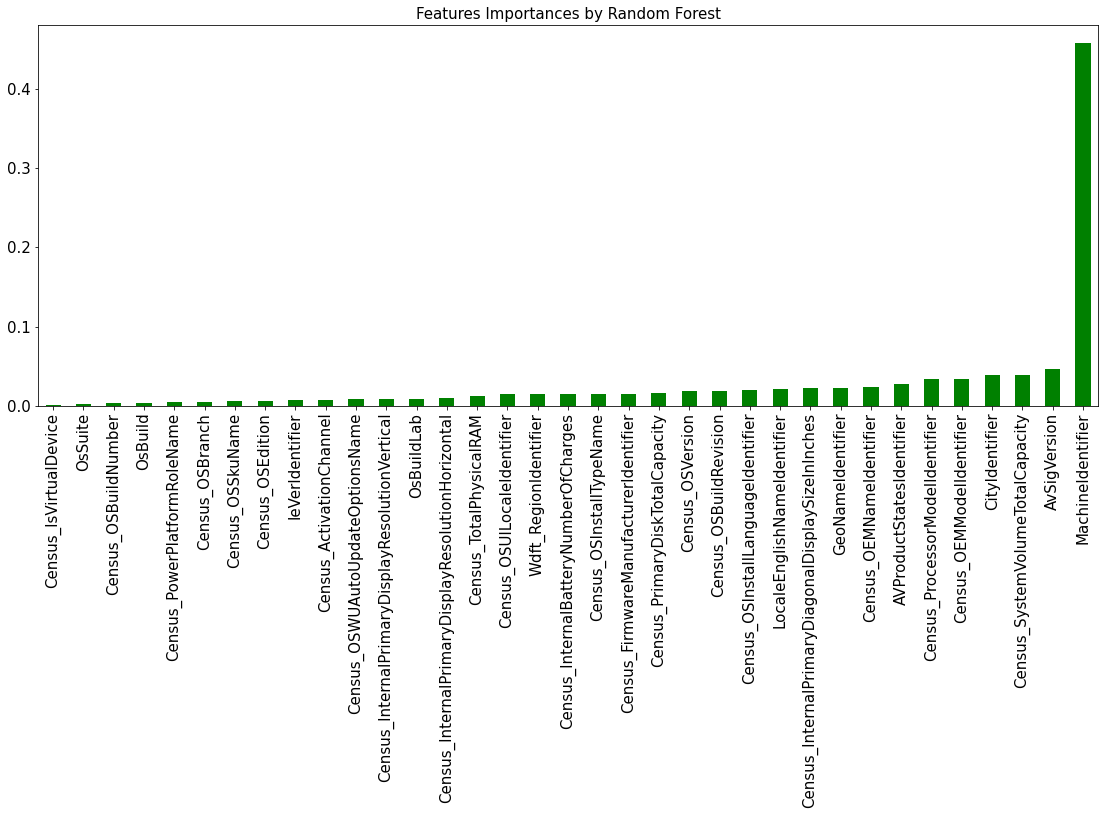

In [12]:
# Random Forest to find important features
rf=RandomForestClassifier()
rf.fit(X, y)
imp = pd.Series(data = rf.feature_importances_, index = X.columns)
imp_sorted = imp.sort_values()
imp_sorted.plot(kind = "bar", color = "green", figsize = (19, 7))
plt.title("Features Importances by Random Forest", size = 15)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()

In [ ]:
# Top 5 Important Features

In [13]:
imp_sorted.tail()

Census_OEMModelIdentifier           0.034256
CityIdentifier                      0.038151
Census_SystemVolumeTotalCapacity    0.038184
AvSigVersion                        0.046590
MachineIdentifier                   0.457800
dtype: float64

In [ ]:
# Select 5 Important Features

In [18]:
data = data[["MachineIdentifier",
             "Census_OEMModelIdentifier",
             "Census_SystemVolumeTotalCapacity",
             "CityIdentifier",
             "AvSigVersion",
             "HasDetections"]]

In [ ]:
# Select Malware and Non Malware Classes

In [19]:
data = data[(data["HasDetections"]==0)|(data["HasDetections"] == 1)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537916 entries, 0 to 567729
Data columns (total 6 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   MachineIdentifier                 537916 non-null  int32  
 1   Census_OEMModelIdentifier         537916 non-null  float64
 2   Census_SystemVolumeTotalCapacity  537916 non-null  int32  
 3   CityIdentifier                    537916 non-null  float64
 4   AvSigVersion                      537916 non-null  int32  
 5   HasDetections                     537916 non-null  float64
dtypes: float64(3), int32(3)
memory usage: 22.6 MB


In [ ]:
# Drop Null Values

In [20]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537916 entries, 0 to 567729
Data columns (total 6 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   MachineIdentifier                 537916 non-null  int32  
 1   Census_OEMModelIdentifier         537916 non-null  float64
 2   Census_SystemVolumeTotalCapacity  537916 non-null  int32  
 3   CityIdentifier                    537916 non-null  float64
 4   AvSigVersion                      537916 non-null  int32  
 5   HasDetections                     537916 non-null  float64
dtypes: float64(3), int32(3)
memory usage: 22.6 MB


**Data Visualizations**

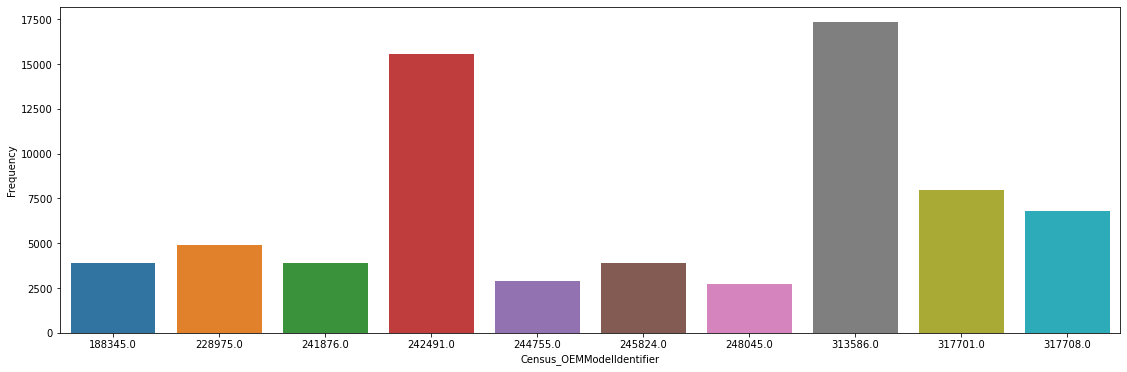

In [34]:
# Frequency Census_OEMModelIdentifier
mic=data["Census_OEMModelIdentifier"].value_counts().to_frame().reset_index()
mic.columns=["Census_OEMModelIdentifier", "Frequency"]
mic=mic.head(10)

plt.figure(figsize = (19, 6))
sns.barplot(x="Census_OEMModelIdentifier",y="Frequency",data=mic)
plt.savefig("Census_OEMModelIdentifier.png")
plt.show()

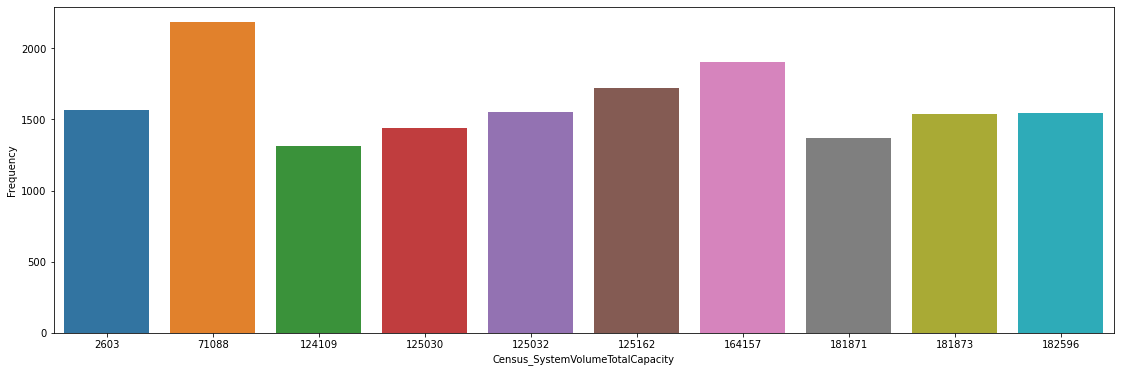

In [35]:
# Frequency of Top 10 Census_SystemVolumeTotalCapacity
csvc=data["Census_SystemVolumeTotalCapacity"].value_counts().to_frame().reset_index()
csvc.columns=["Census_SystemVolumeTotalCapacity", "Frequency"]
csvc=csvc.head(10)
plt.figure(figsize=(19,6))
sns.barplot(x="Census_SystemVolumeTotalCapacity",y="Frequency",data=csvc)
plt.savefig("Census_SystemVolumeTotalCapacity.png")
plt.show()

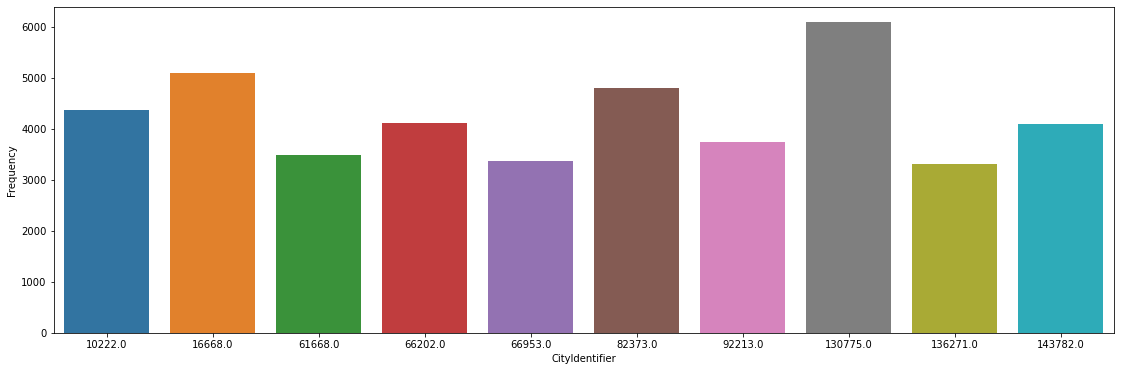

In [36]:
# Frequency of Top CityIdentifier
ci=data["CityIdentifier"].value_counts().to_frame().reset_index()
ci.columns=["CityIdentifier", "Frequency"]
ci=ci.head(10)
plt.figure(figsize=(19,6))
sns.barplot(x="CityIdentifier",y="Frequency",data=ci)
plt.savefig("CityIdentifier.png")
plt.show()

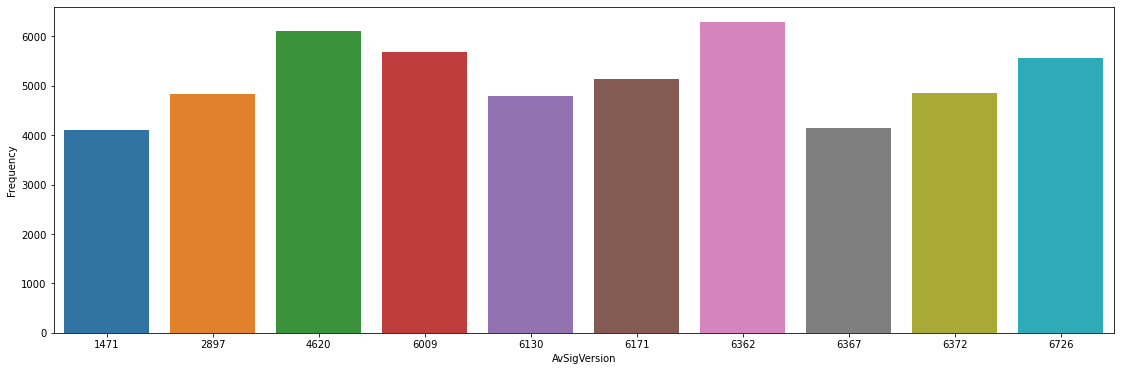

In [32]:
# Frequency Top 10 of AvSigVersion
avs=data["AvSigVersion"].value_counts().to_frame().reset_index()
avs.columns=["AvSigVersion", "Frequency"]
avs=avs.head(10)
plt.figure(figsize=(19,6))
sns.barplot(x="AvSigVersion",y="Frequency",data=avs)
plt.show()

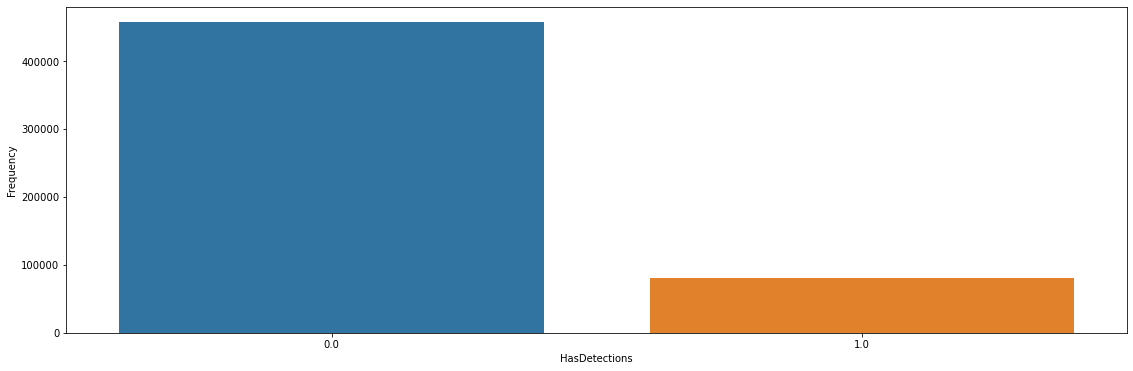

In [37]:
# Frequency of HasDetections
hd=data["HasDetections"].value_counts().to_frame().reset_index()
hd.columns=["HasDetections", "Frequency"]
hd=hd.head(10)
plt.figure(figsize=(19,6))
sns.barplot(x="HasDetections",y="Frequency",data=hd)
plt.savefig("Hasdetections.png")
plt.show()

In [ ]:
# Label Encoding on object type columns

In [17]:
object=data.select_dtypes(include=['object'])
le=LabelEncoder()

for feature in object:
    
    data[feature]=le.fit_transform(data[feature].astype(str))

In [ ]:
# Separate Features and Target

In [88]:
X=data[data.columns.drop("HasDetections")]
y=data["HasDetections"]

In [ ]:
# Split Data into Training Set and Testing Set

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 42)

In [ ]:
# Apply SMOTE to balance classes

In [90]:
sm=SMOTE(random_state=42)
X_res,y_res=sm.fit_resample(X_train, y_train)

In [ ]:
# Scaling

In [91]:
sc=StandardScaler()

sc_train=sc.fit_transform(X_res)
sc_test=sc.transform(X_test)

In [ ]:
# Random Forest Classifier

In [92]:
#Find best Criterion
rf_criterion=["entropy", "gini"]
score_rf=[]
for x in rf_criterion:
    rf=RandomForestClassifier(criterion=x,n_estimators=500,n_jobs=-1,random_state=12345678)
    rf.fit(X_res,y_res)
    pred_rf=rf.predict(X_test)
    accuracy_rf=accuracy_score(y_test,pred_rf)
    score_rf.append(accuracy_rf)
score_rf

[0.855144848954299, 0.8552130131680867]

In [ ]:
# Select Gini as Criterion

In [93]:
rf = RandomForestClassifier(criterion="gini",n_estimators=500,n_jobs=-1,random_state=12345678)
rf.fit(X_res, y_res)
pred_rf=rf.predict(X_test)

In [94]:
confusion_matrix(y_test,pred_rf)

array([[115180,  21943],
       [  1422,  22830]], dtype=int64)

In [95]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91    137123
         1.0       0.51      0.94      0.66     24252

    accuracy                           0.86    161375
   macro avg       0.75      0.89      0.78    161375
weighted avg       0.92      0.86      0.87    161375



In [ ]:
# Adaboost with Decision Tree

In [97]:
# Find Best Criterion For Decision Tree
criterion_dt=["gini", "entropy"]
dt_score = []
for x in criterion_dt:
    dt = DecisionTreeClassifier(criterion=x,random_state=123456789)
    dt.fit(X_res,y_res)
    pred_dt=dt.predict(X_test)
    accuracy=accuracy_score(y_test,pred_dt)
    dt_score.append(accuracy)
dt_score

[0.8556715724244771, 0.8562478698683191]

In [ ]:
# Select Gini as Criterion

In [98]:
# AdaBoost with Decision Tree
adc=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion="gini", random_state=123456789))
adc.fit(X_res, y_res)
pred_adc=adc.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_test,pred_adc))

[[120163  16960]
 [  6335  17917]]


In [99]:
# Classification Report for AdaBoost with Decision Tree
print(classification_report(y_test,pred_adc))

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91    137123
         1.0       0.51      0.74      0.61     24252

    accuracy                           0.86    161375
   macro avg       0.73      0.81      0.76    161375
weighted avg       0.88      0.86      0.87    161375



In [100]:
# Artificial Neural Network
model = Sequential()
model.add(Dense(100,activation="relu",input_dim=5))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(sc_train,y_res,epochs=15)

Epoch 1/15
19997/19997 [==============================] - 32s 1ms/step - loss: 0.2510 - accuracy: 0.9099
Epoch 2/15
19997/19997 [==============================] - 29s 1ms/step - loss: 0.2448 - accuracy: 0.9122
Epoch 3/15
19997/19997 [==============================] - 29s 1ms/step - loss: 0.2432 - accuracy: 0.9124
Epoch 4/15
19997/19997 [==============================] - 29s 1ms/step - loss: 0.2430 - accuracy: 0.9125
Epoch 5/15
19997/19997 [==============================] - 29s 1ms/step - loss: 0.2424 - accuracy: 0.9126
Epoch 6/15
19997/19997 [==============================] - 29s 1ms/step - loss: 0.2421 - accuracy: 0.9128
Epoch 7/15
19997/19997 [==============================] - 29s 1ms/step - loss: 0.2418 - accuracy: 0.9128
Epoch 8/15
19997/19997 [==============================] - 29s 1ms/step - loss: 0.2416 - accuracy: 0.9129
Epoch 9/15
19997/19997 [==============================] - 30s 1ms/step - loss: 0.2416 - accuracy: 0.9130
Epoch 10/15
19997/19997 [==============================

In [101]:
# Model Evaluation
model.evaluate(sc_test,y_test)[1]

5043/5043 [==============================] - 5s 962us/step - loss: 0.3010 - accuracy: 0.8519


0.8518605828285217

In [102]:
# Prediction on splitting test set
model_train=np.round(model.predict(sc_test))

In [103]:
# Confusion matrix
print(confusion_matrix(y_test,model_train))

[[113237  23886]
 [    20  24232]]


In [105]:
print(classification_report(y_test, model_train))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.90    137123
         1.0       0.50      1.00      0.67     24252

    accuracy                           0.85    161375
   macro avg       0.75      0.91      0.79    161375
weighted avg       0.93      0.85      0.87    161375

